In [1]:
#100本ノック第7章　60
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/GoogleNews-vectors-negative300.bin.gz', binary=True)
model["United_States"]

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

In [2]:
#100本ノック第7章　61
import numpy as np

print(np.dot(model["United_States"], model["U.S."]) / (np.linalg.norm(model["United_States"]) * np.linalg.norm(model["U.S."])))

0.7310775


In [3]:
#100本ノック第7章　62
model.wv.most_similar(positive=["United_States"], topn = 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

In [4]:
model.wv.most_similar(negative=["United_States"], topn = 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('Tau_Tau', 0.32492831349372864),
 ('nigel.tutt_@_thomson.com', 0.324587881565094),
 ('SARNIA_Ont', 0.3112543821334839),
 ('Milik', 0.30182304978370667),
 ('CHIEFTAIN_PHOTO', 0.2870790958404541),
 ('Bwlch_y', 0.281516432762146),
 ('BANGKOK_PARADISE', 0.2794737219810486),
 ('Ki_Raat', 0.27843740582466125),
 ('IF_SEPT', 0.2745283544063568),
 ('Globalization_KEY_FACTORS', 0.2729308009147644)]

In [5]:
#100本ノック第7章　63
from gensim.models.word2vec import Word2Vec
add_list = model["Spain"] - model["Madrid"] + model["Athens"]
model.wv.similar_by_vector(add_list, topn = 10, restrict_vocab=None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


[('Athens', 0.7528455853462219),
 ('Greece', 0.6685472726821899),
 ('Aristeidis_Grigoriadis', 0.5495778322219849),
 ('Ioannis_Drymonakos', 0.5361456871032715),
 ('Greeks', 0.5351786613464355),
 ('Ioannis_Christou', 0.5330226421356201),
 ('Hrysopiyi_Devetzi', 0.5088489055633545),
 ('Iraklion', 0.5059264898300171),
 ('Greek', 0.5040615797042847),
 ('Athens_Greece', 0.5034109354019165)]

In [18]:
#100本ノック第7章　64
ques_t = "/content/drive/MyDrive/questions-words.txt"
simques_t = "similar_questions-words2.txt"
q = open(ques_t, "r")
sq = open(simques_t, "w")

#i = 0
for line in q:
  vec = line.split()
  #i += 1
  if vec[0] != ":":# and i < 11:
    vec_ans = model[vec[1]]-model[vec[0]]+model[vec[2]]
    sim = model.wv.similar_by_vector(vector= vec_ans, topn = 4, restrict_vocab=None)
    for j in range(4):
      if sim[j][0] != vec[0] and sim[j][0] != vec[1] and sim[j][0] != vec[2]:
        ans = sim[j]
        break
    sq.write(" ".join([type] + [line.rstrip()] + [ans[0]] + [str(ans[1])]) + "\n")
  elif vec[0] == ":":# and i < 11:
    type = vec[1]



q.close()
sq.close()

!head -10 similar_questions-words1.txt


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]


capital-common-countries Athens Greece Baghdad Iraq Baghdad 0.7489826679229736
capital-common-countries Athens Greece Bangkok Thailand Bangkok 0.7431141138076782
capital-common-countries Athens Greece Beijing China China 0.7186591625213623
capital-common-countries Athens Greece Berlin Germany Germany 0.6720892786979675
capital-common-countries Athens Greece Bern Switzerland Bern 0.6902341842651367
capital-common-countries Athens Greece Cairo Egypt Egypt 0.7626821398735046
capital-common-countries Athens Greece Canberra Australia Canberra 0.7407206892967224
capital-common-countries Athens Greece Hanoi Vietnam Hanoi 0.7509901523590088
capital-common-countries Athens Greece Havana Cuba Havana 0.7262827754020691
capital-common-countries Athens Greece Helsinki Finland Helsinki 0.7235296964645386


In [19]:
#100本ノック第7章　65
text = "similar_questions-words2.txt"
f = open(text, "r")
bunsi_sem = 0
bunbo_sem = 0
bunsi_syn = 0
bunbo_syn = 0
for line in f:
  word = line.split()
  if "gram" not in word[0]:
    bunbo_sem += 1
    if word[4] == word[5]:
      bunsi_sem += 1
  elif "gram" in word[0]:
    bunbo_syn += 1
    if word[4] == word[5]:
      bunsi_syn += 1

f.close()
print("意味的アナロジー:" + str(bunsi_sem/bunbo_sem))
print("文法的アナロジー:" + str(bunsi_syn/bunbo_syn))

意味的アナロジー:0.7136092005863118
文法的アナロジー:0.7335831381733021


In [ ]:
#100本ノック第7章　66
combine = "combined.csv"

q = open(combine, "r")
line_list = []
for line in q:
  if line[0] != "W":
    word = line.split(",")
    word[2] = word[2].strip("\n")
    line_list.append(word)

q.close()

sim_list = []
for word in line_list:
  word.append(np.dot(model[word[0]], model[word[1]]) / (np.linalg.norm(model[word[0]]) * np.linalg.norm(model[word[1]])))
print(line_list)

w_vec_ran = []
hum_ran = []
for lis in line_list:
  w_vec_ran.append(float(lis[3]))
  hum_ran.append(float(lis[2]))

w_vec_ran.sort(reverse=True)
hum_ran.sort(reverse=True)

vec_ran_n = []
hum_ran_n = []

for lis in line_list:
  for rank in range(len(hum_ran)):
    if float(lis[2]) - hum_ran[rank] == 0:
      hum_ran_n.append(int(rank)+1)
      break

for lis in line_list:
  for rank in range(len(w_vec_ran)):
    if float(lis[3]) == w_vec_ran[rank]:
        vec_ran_n.append(int(rank)+1)
        break

from scipy.stats import spearmanr

correlation, pvalue = spearmanr(vec_ran_n, hum_ran_n)
print(correlation)

[['love', 'sex', '6.77', 0.26393774], ['tiger', 'cat', '7.35', 0.5172962], ['tiger', 'tiger', '10.00', 1.0], ['book', 'paper', '7.46', 0.3634626], ['computer', 'keyboard', '7.62', 0.39639163], ['computer', 'internet', '7.58', 0.40686235], ['plane', 'car', '5.77', 0.37796983], ['train', 'car', '6.31', 0.34025612], ['telephone', 'communication', '7.50', 0.33218452], ['television', 'radio', '6.77', 0.61149716], ['media', 'radio', '7.42', 0.38991612], ['drug', 'abuse', '6.85', 0.24085772], ['bread', 'butter', '6.19', 0.6417261], ['cucumber', 'potato', '5.92', 0.5678562], ['doctor', 'nurse', '7.00', 0.6319524], ['professor', 'doctor', '6.62', 0.21336085], ['student', 'professor', '6.81', 0.42066184], ['smart', 'student', '4.62', 0.06630216], ['smart', 'stupid', '5.81', 0.47047195], ['company', 'stock', '7.08', 0.34156865], ['stock', 'market', '8.08', 0.46805564], ['stock', 'phone', '1.62', 0.123267554], ['stock', 'CD', '1.31', 0.066117905], ['stock', 'jaguar', '0.92', 0.036066905], ['stock'

In [20]:
#100本ノック第7章　67

text = "similar_questions-words2.txt"
f = open(text, "r")
country_list = []
for line in f:
  word = line.split()
  if word[0] == "capital-common-countries" or word[0] == "capital-world":
    if word[2] not in country_list:
      country_list.append(word[2])
    
f.close()
country_list.append("United_States")

country_vec = []
for c in country_list:
  country_vec.append(model[c])

from sklearn.cluster import KMeans
pred = KMeans(n_clusters=5).fit(country_vec)
cluster = pred.predict(country_vec)
cluster_list = []
cluster_ilist = []

for i in range(5):
  for j in range(len(country_list)):
    if i == cluster[j]:
      cluster_ilist.append(country_list[j])
  cluster_list.append(cluster_ilist)
  cluster_ilist = []

for i in range(5):
  print("cluster" + str(i) + ":" + ",".join(cluster_list[i]))

cluster0:Russia,Turkey,Turkmenistan,Kazakhstan,Azerbaijan,Serbia,Kyrgyzstan,Romania,Moldova,Tajikistan,Ukraine,Belarus,Cyprus,Montenegro,Latvia,Macedonia,Bulgaria,Estonia,Uzbekistan,Georgia,Albania,Lithuania,Armenia
cluster1:Iraq,Thailand,China,Egypt,Vietnam,Pakistan,Afghanistan,Iran,Jordan,Samoa,Lebanon,Syria,Bangladesh,Qatar,Tuvalu,Indonesia,Nepal,Bahrain,Philippines,Oman,Morocco,Fiji,Taiwan,Bhutan,Libya,Tunisia,Laos
cluster2:Nigeria,Ghana,Algeria,Madagascar,Eritrea,Mali,Gambia,Burundi,Guinea,Senegal,Botswana,Zimbabwe,Uganda,Sudan,Rwanda,Gabon,Malawi,Angola,Zambia,Mozambique,Somalia,Liberia,Kenya,Niger,Mauritania,Namibia
cluster3:Greece,Germany,Switzerland,Australia,Finland,England,Spain,Norway,Canada,France,Italy,Sweden,Japan,Slovakia,Belgium,Hungary,Denmark,Ireland,Portugal,Slovenia,Uruguay,Greenland,Liechtenstein,Malta,Austria,Poland,Croatia,United_States
cluster4:Cuba,Belize,Venezuela,Guyana,Jamaica,Peru,Nicaragua,Bahamas,Suriname,Ecuador,Dominica,Chile,Honduras


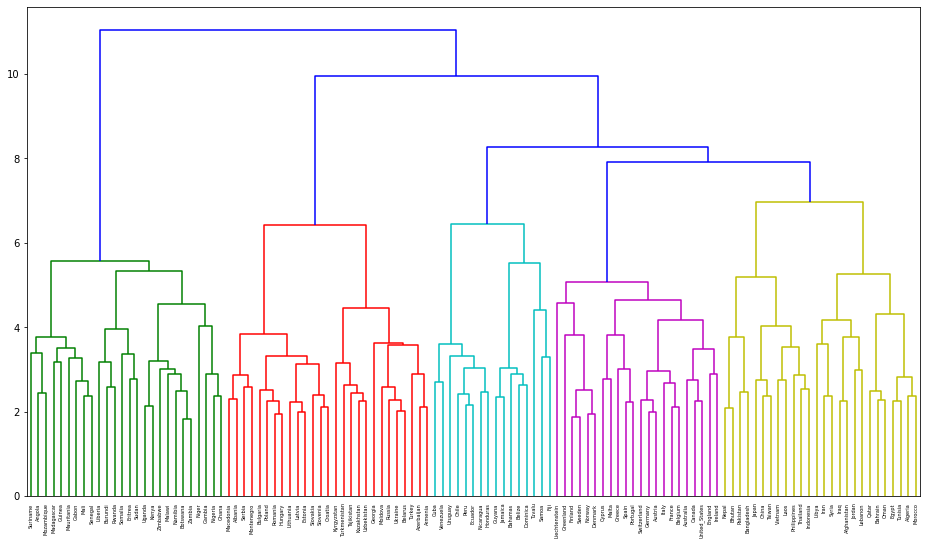

In [21]:
#100本ノック第7章　68
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
 
linkage_result = linkage(country_vec, method='ward')
plt.figure(figsize=(16, 9))
dendrogram(linkage_result, labels=country_list)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


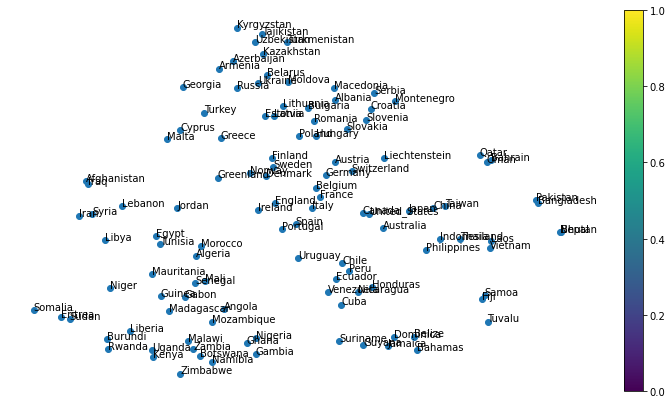

In [22]:
#100本ノック第7章　69
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
X_reduced = tsne.fit_transform(country_vec)

plt.figure(figsize=(13, 7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.axis('off')
plt.colorbar()
for i in range(len(country_list)):
  plt.annotate(country_list[i], (X_reduced[i, 0], X_reduced[i, 1]))
plt.show()